In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display, display_markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import json
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
from json import loads
from os import listdir, path

import logging
logging.getLogger().setLevel(logging.WARNING)

def display_md(md, **kwargs):
    return display_markdown(md, raw=True, **kwargs)

def convert_notebook(title, output='html'):
    convert = sp.run(f'jupyter nbconvert {title}.ipynb --to {output} --output {title}.{output}'.split(' '))
    if convert.returncode == 0:
        display_md(f'Jupyter notebook `{title}` converted successfully.')
    else:
        display_md(f'Error: encountered problem converting Jupyter notebook `{title}`')

def standardize(x):
    return (x - x.mean()) / x.std()

sns.set(style='darkgrid', context='notebook')

pd.options.mode.chained_assignment = None

## 1. Load data

In [2]:
df_mean = pd.read_csv('data/viz_vs_ling_ratings.tsv', sep='\t')
display(df_mean)

,color,adjective,init_x,init_y,final_x,final_y,rt,index,trial_num,neither_vs_both,viz_vs_ling,catch_score
0,black,active,690.0,50.0,238.500000,229.000000,5090.733333,59.500000,51.333333,0.546723,0.595520,5.756222
1,black,aggressive,690.0,50.0,242.333333,228.166667,4569.100000,50.500000,48.166667,0.554774,0.557286,5.756222
2,black,alive,690.0,50.0,186.285714,226.857143,5079.242857,64.857143,56.214286,0.406689,0.547428,5.810356
3,black,angry,690.0,50.0,231.153846,217.384615,5502.823077,49.461538,63.615385,0.531403,0.585132,5.852350
4,black,calm,690.0,50.0,203.769231,175.076923,5640.623077,40.461538,43.153846,0.455555,0.412723,5.852350
...,...,...,...,...,...,...,...,...,...,...,...,...
301,yellow,soft,690.0,50.0,236.800000,187.000000,5685.360000,57.200000,40.400000,0.529406,0.451740,5.895769
302,yellow,stale,690.0,50.0,232.166667,205.083333,4509.725000,34.500000,55.833333,0.518368,0.456127,5.756222
303,yellow,submissive,690.0,50.0,212.416667,236.416667,5355.508333,43.500000,66.333333,0.482120,0.581044,5.756222
304,yellow,tense,690.0,50.0,185.785714,267.357143,4966.478571,57.857143,53.000000,0.414676,0.655886,5.810356


## 2. Examine highest and lowest ratings for each rating scale

### Sorted by visual versus linguistic rating

In [3]:
df_mean.sort_values('viz_vs_ling').round(2)

,color,adjective,init_x,init_y,final_x,final_y,rt,index,trial_num,neither_vs_both,viz_vs_ling,catch_score
8,black,dirty,690.0,50.0,272.62,116.15,5408.80,69.54,43.38,0.61,0.20,5.82
257,white,light,690.0,50.0,295.00,113.07,4837.14,34.86,52.14,0.66,0.25,5.81
62,blue,slow,690.0,50.0,245.54,139.46,4900.36,38.46,53.15,0.54,0.26,5.85
104,green,alive,690.0,50.0,258.57,121.79,6448.44,68.86,63.00,0.58,0.27,5.81
291,yellow,light,690.0,50.0,260.07,134.43,4107.62,30.86,77.21,0.58,0.28,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...
11,black,exciting,690.0,50.0,217.07,286.53,6029.87,37.20,51.13,0.49,0.69,5.90
241,white,angry,690.0,50.0,232.69,255.38,4121.02,55.46,63.31,0.53,0.71,5.85
228,red,relaxed,690.0,50.0,206.79,292.57,4794.69,45.86,60.79,0.45,0.72,5.81
222,red,jealous,690.0,50.0,236.46,324.92,4779.31,32.54,56.23,0.53,0.76,5.82


### Sorted by neither versus both rating

In [4]:
df_mean.sort_values('neither_vs_both').round(2)

,color,adjective,init_x,init_y,final_x,final_y,rt,index,trial_num,neither_vs_both,viz_vs_ling,catch_score
42,blue,dirty,690.0,50.0,98.69,173.69,4584.35,76.54,44.08,0.22,0.34,5.82
175,purple,clean,690.0,50.0,107.31,173.92,4149.52,65.54,56.38,0.24,0.37,5.82
144,orange,dirty,690.0,50.0,108.00,156.92,5172.27,70.54,67.23,0.24,0.30,5.82
187,purple,hot,690.0,50.0,111.77,219.92,4782.59,56.54,62.23,0.25,0.47,5.82
197,purple,selfless,690.0,50.0,119.62,247.62,5328.63,29.54,59.00,0.27,0.56,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...
115,green,fresh,690.0,50.0,322.54,205.31,5320.33,80.46,51.46,0.73,0.48,5.85
259,white,new,690.0,50.0,326.92,193.77,5910.63,55.46,58.92,0.73,0.41,5.81
243,white,clean,690.0,50.0,328.69,148.69,4812.90,66.54,61.31,0.74,0.30,5.82
60,blue,sad,690.0,50.0,352.38,252.23,5214.18,83.46,43.54,0.79,0.57,5.81


## 3. How are viz vs. ling and neither vs. both related?
### Basic bivariate correlation

In [5]:
print(f'r(viz vs. ling, neither vs. both) = {pearsonr(df_mean["viz_vs_ling"], df_mean["neither_vs_both"])[0]:.2f}')

r(viz vs. ling, neither vs. both) = -0.06


### Scatter/density plot

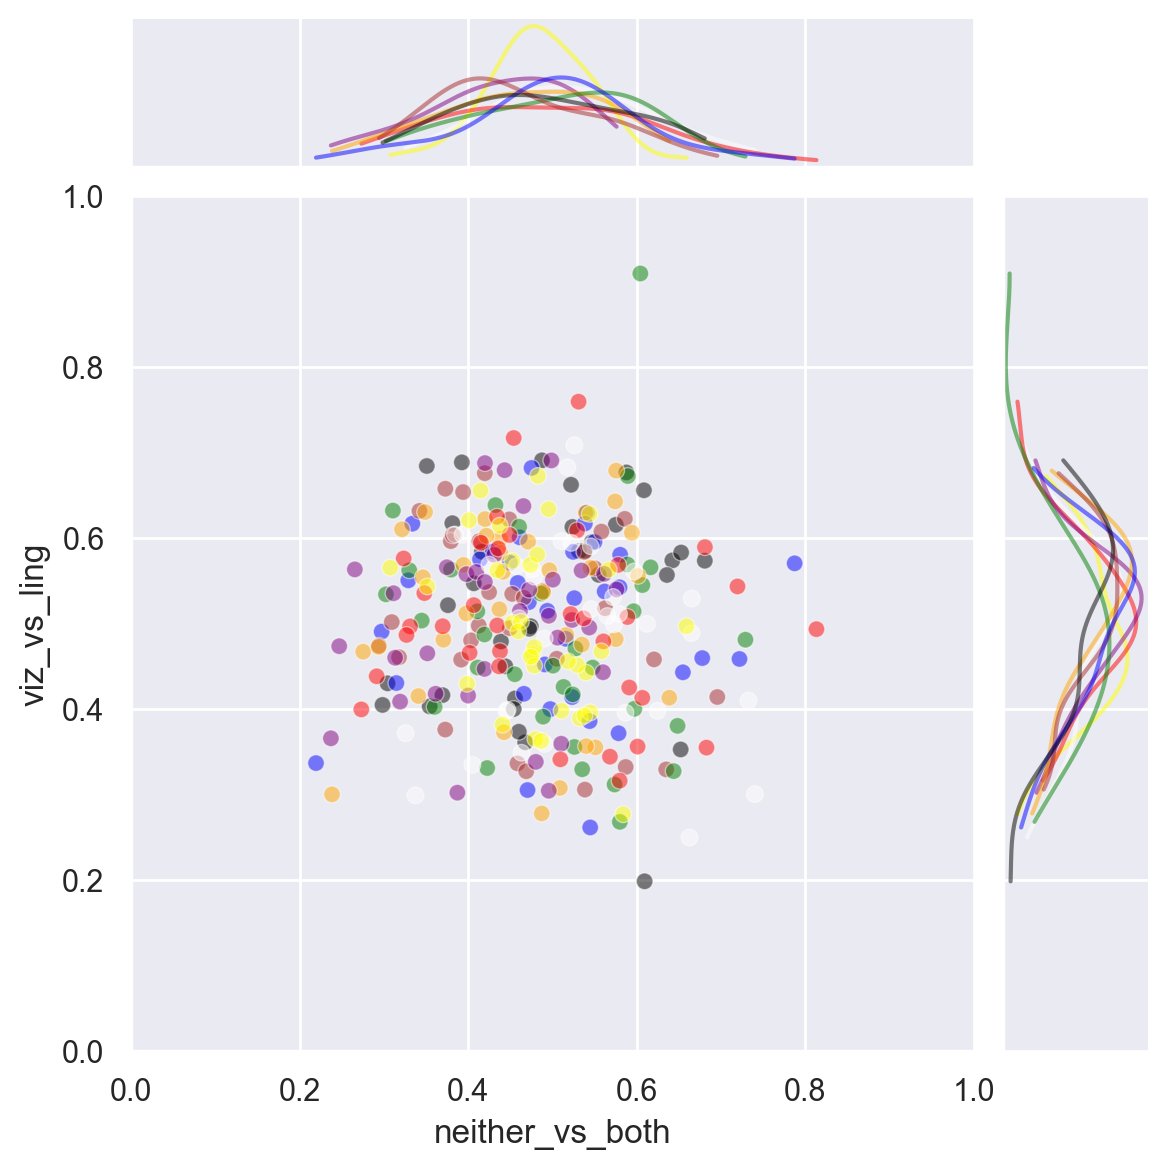

In [6]:
colordict = {color: color for color in df_mean['color'].unique()}

g = sns.JointGrid(
    x='neither_vs_both',
    y='viz_vs_ling',
    hue='color',
    data=df_mean,
    palette=colordict,
)
g.plot_joint(sns.scatterplot, alpha=.5);
g.plot_marginals(sns.kdeplot, cut=0, alpha=.5);
g.ax_joint.set(xlim=[0, 1], ylim=[0, 1]);
g.ax_joint.legend_.remove()

### Load original dataset and transform current projections (e.g. blue/happy-sad) to pairwise ratings (e.g. blue/sad)

In [7]:
df_joint = pd.read_csv('data/data_plus_predictors.tsv', sep='\t')
df_joint[['dim1', 'dim2']] = df_joint['dimension'].str.split('-', 1, expand=True)
df1 = df_joint.copy()
df2 = df_joint.copy()
df1['adjective'] = df1['dim1']
df2['adjective'] = df2['dim2']
df1['rating'] = 8.0 - df1['rating']
df_joint = pd.concat([df1, df2])
df_joint = df_joint.merge(df_mean, how='left', on=['adjective', 'color'])

df_joint = df_joint[df_joint['viz_vs_ling'].notna()]  # toss a small number cases with missing data
display(df_joint)

,index_x,group,dimension,pp_id,color,rating,experiment,self_vs_other,art,fiction,...,init_x,init_y,final_x,final_y,rt,index_y,trial_num,neither_vs_both,viz_vs_ling,catch_score
0,0,sighted,cold-hot,sighted_1,white,7.0,original,self,NaN,NaN,...,690.0,50.0,294.923077,227.000000,6207.876923,48.538462,58.076923,0.664902,0.489244,5.819309
1,1,sighted,ripe-unripe,sighted_1,white,1.0,original,self,NaN,NaN,...,690.0,50.0,204.076923,173.923077,5316.361538,64.461538,49.000000,0.446702,0.399208,5.852350
2,2,sighted,new-old,sighted_1,white,7.0,original,self,NaN,NaN,...,690.0,50.0,326.923077,193.769231,5910.630769,55.461538,58.923077,0.732487,0.410169,5.812720
3,3,sighted,submissive-aggressive,sighted_1,white,7.0,original,self,NaN,NaN,...,690.0,50.0,264.583333,245.083333,5315.916667,47.500000,44.666667,0.596915,0.561239,5.756222
4,4,sighted,selfless-jealous,sighted_1,white,7.0,original,self,NaN,NaN,...,690.0,50.0,188.230769,247.538462,5038.100000,30.538462,50.384615,0.425072,0.569222,5.819309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85954,28506,sighted,soft-hard,sighted_68129,red,5.0,replication_2,other,11.0,0.0,...,690.0,50.0,200.200000,257.000000,5032.433334,63.200000,51.000000,0.449069,0.603926,5.895769
85955,28507,sighted,light-heavy,sighted_68129,red,5.0,replication_2,other,11.0,0.0,...,690.0,50.0,196.857143,235.285714,5845.764286,36.857143,48.071429,0.435588,0.588123,5.810356
85956,28508,sighted,relaxed-tense,sighted_68129,red,5.0,replication_2,other,11.0,0.0,...,690.0,50.0,270.571429,158.000000,5433.028571,54.857143,59.642857,0.600970,0.356426,5.810356
85957,28509,sighted,alive-dead,sighted_68129,red,6.0,replication_2,other,11.0,0.0,...,690.0,50.0,263.500000,223.285714,4430.907143,72.857143,60.214286,0.588889,0.507942,5.810356


In [8]:
df_self = df_joint[df_joint['self_vs_other'] == 'self']

df_blind = df_self[df_self['group'] == 'blind'].groupby(
    ['adjective', 'color']).mean().sort_values(
    ['adjective', 'color']).reset_index()
df_sighted = df_self[df_self['group'] == 'sighted'].groupby(
    ['adjective', 'color']).mean().sort_values(
    ['adjective', 'color']).reset_index()

df_diff = df_blind[[
    'adjective',
    'color',
    'cosine_fic_z',
    'viz_vs_ling',
    'neither_vs_both',
]]
df_diff['blind_rating'] = df_blind['rating']
df_diff['sighted_rating'] = df_sighted['rating']
df_diff['rating_diff'] = df_diff['sighted_rating'] - df_diff['blind_rating']

### Correlations between visual/linguistic/association ratings and the original blind/sighted participants' color/dimension ratings

In [9]:
def print_corr(df, col1, col2):
    r = pearsonr(df[col1], df[col2])
    print(f'r({col1}, {col2}) = {r[0]:.2f} (p = {r[1]:.3f})')
    return

print('Correlation with rating differences between ratings from blind and sighted participants:')
print_corr(df_diff, 'viz_vs_ling', 'rating_diff')
print_corr(df_diff, 'neither_vs_both', 'rating_diff')

print('\nCorrelation with ratings from blind participants:')
print_corr(df_diff, 'viz_vs_ling', 'sighted_rating')
print_corr(df_diff, 'neither_vs_both', 'sighted_rating')

print('\nCorrelation with ratings from blind participants:')
print_corr(df_diff, 'viz_vs_ling', 'blind_rating')
print_corr(df_diff, 'neither_vs_both', 'blind_rating')

Correlation with rating differences between ratings from blind and sighted participants:
r(viz_vs_ling, rating_diff) = -0.18 (p = 0.002)
r(neither_vs_both, rating_diff) = 0.08 (p = 0.143)

Correlation with ratings from blind participants:
r(viz_vs_ling, sighted_rating) = -0.24 (p = 0.000)
r(neither_vs_both, sighted_rating) = 0.52 (p = 0.000)

Correlation with ratings from blind participants:
r(viz_vs_ling, blind_rating) = -0.08 (p = 0.143)
r(neither_vs_both, blind_rating) = 0.40 (p = 0.000)


### Scatterplots
#### Visual vs. linguistic and rating difference between blind and sighted
We would expect this to be negative if sighted people give higher association ratings to color/adjective associations that are rated as more visual in nature than blind people do. (In other words, a more visual rating predicts lower association score for blind than for sighted people in the Saysani data once you split the color/dimension ratings into color/adjective association scores.)

r(viz_vs_ling, rating_diff) = -0.18 (p = 0.002)


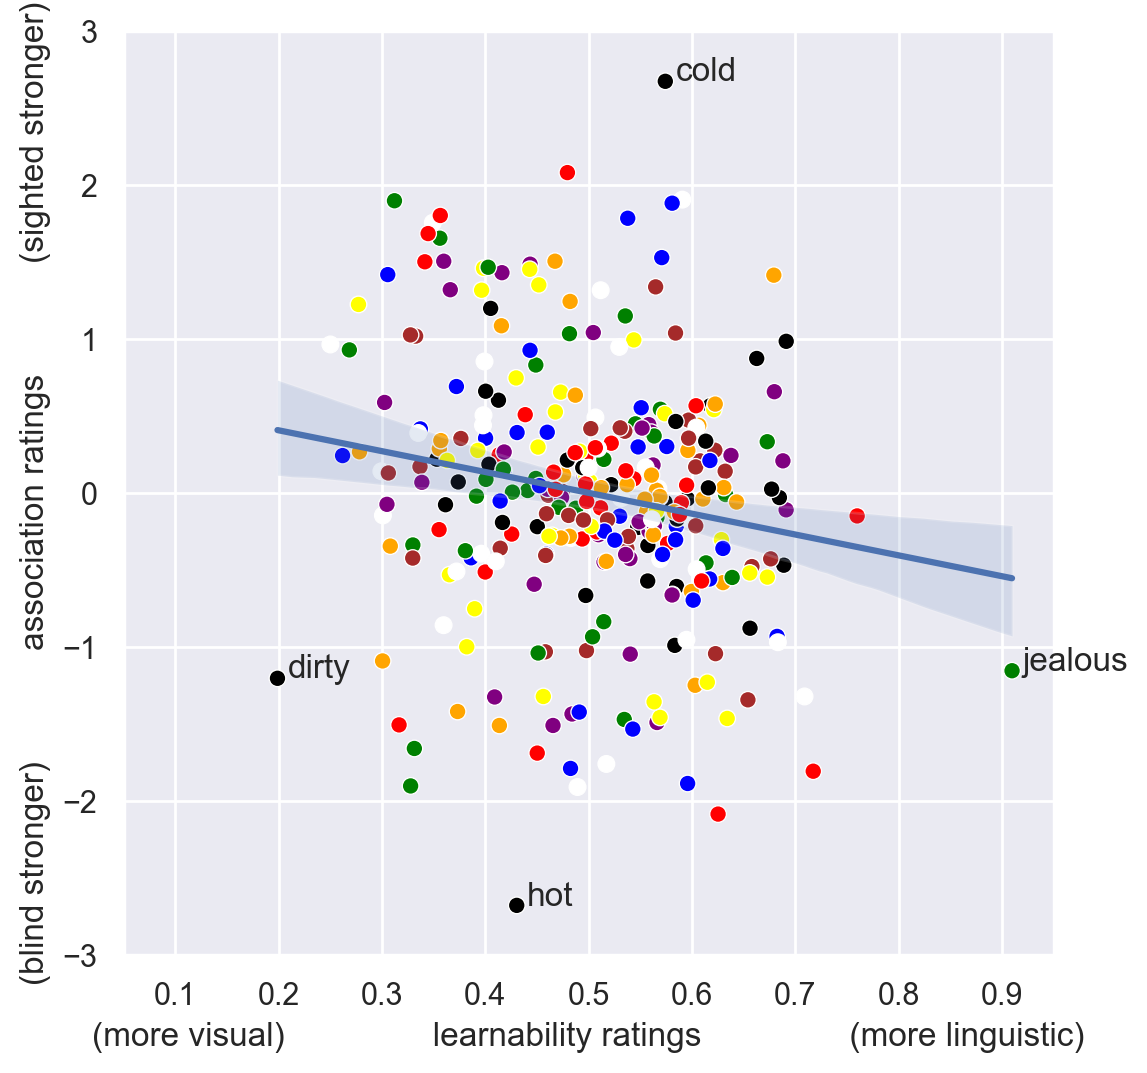

In [10]:
sns.set(rc={'figure.figsize': (6, 6)})

def annot(ax, df, x, y, label):
    for i, row in df.iterrows():
        if ((row[x] == df[x].max()) or (row[x] == df[x].min())) or ((row[y] == df[y].max()) or (row[y] == df[y].min())):
            ax.text(row[x] + .01, row[y], row[label])

ax = sns.scatterplot(x='viz_vs_ling', y='rating_diff',
                     data=df_diff, hue='color', palette=colordict, legend=False)

sns.regplot(x='viz_vs_ling', y='rating_diff', scatter=False,
                     data=df_diff, ax=ax);

ax.set(xlabel='(more visual)                learnability ratings                (more linguistic)',
       ylabel='(blind stronger)            association ratings            (sighted stronger)',
       xlim=[.05, .95], ylim=[-3, 3])

annot(ax, df_diff, 'viz_vs_ling', 'rating_diff', 'adjective')

plt.savefig('figures/vizling_vs_ratingdiff_scatter.pdf')

print_corr(df_diff, 'viz_vs_ling', 'rating_diff')

#### Neither vs. both and rating difference between blind and sighted
We expect these two to be uncorrelated: There is no reason to believe that association strength rated orthogonally (literally!) to the visual/linguistic nature of the association should have any differential impact on how blind and sighted people rate the associations.

r(neither_vs_both, rating_diff) = 0.08 (p = 0.143)


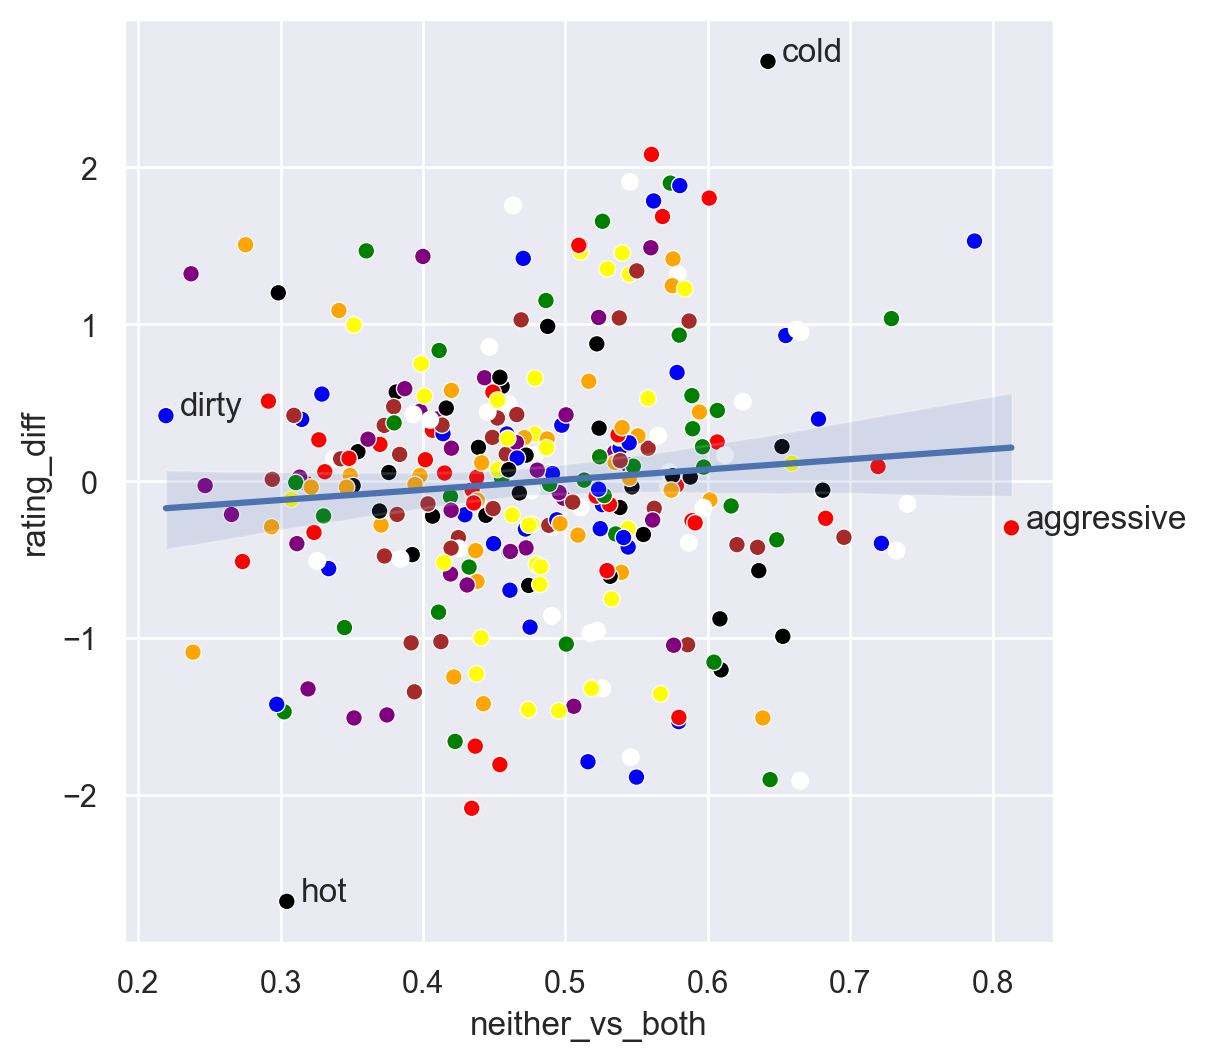

In [11]:
ax = sns.scatterplot(
    x='neither_vs_both', y='rating_diff',
    data=df_diff, hue='color', palette=colordict, legend=False
)

sns.regplot(
    x='neither_vs_both', y='rating_diff', scatter=False,
    data=df_diff, ax=ax
);

annot(ax, df_diff, 'neither_vs_both', 'rating_diff', 'adjective')

print_corr(df_diff, 'neither_vs_both', 'rating_diff')

#### Visual vs. linguistic and sighted ratings
Do we expect a correlation here? Only if sighted participants do not weight linguistic or visual association the same when considering if a color and adjective are associated!

Specifically, negative correlation means sighted participants rated more visual color/adjective associations more highly than more linguistic associations.  
This is weird, because if a whole dimension is more visual in nature, one would expect _both_ adjectives in the dimension to be rated highly on the visual rating scale, but this would obviously cancel out any effect this dimension has on the correlation. So the ratings that have a strong impact here are ones where one end of the scale is strongly visual or linguistic, and the other isn't (e.g. green/jealous is strongly linguistic, but the opposite of the end is not; red/hot is strongly visual, but red/cold is neither linguistic nor visual, etc.).

r(viz_vs_ling, sighted_rating) = -0.24 (p = 0.000)


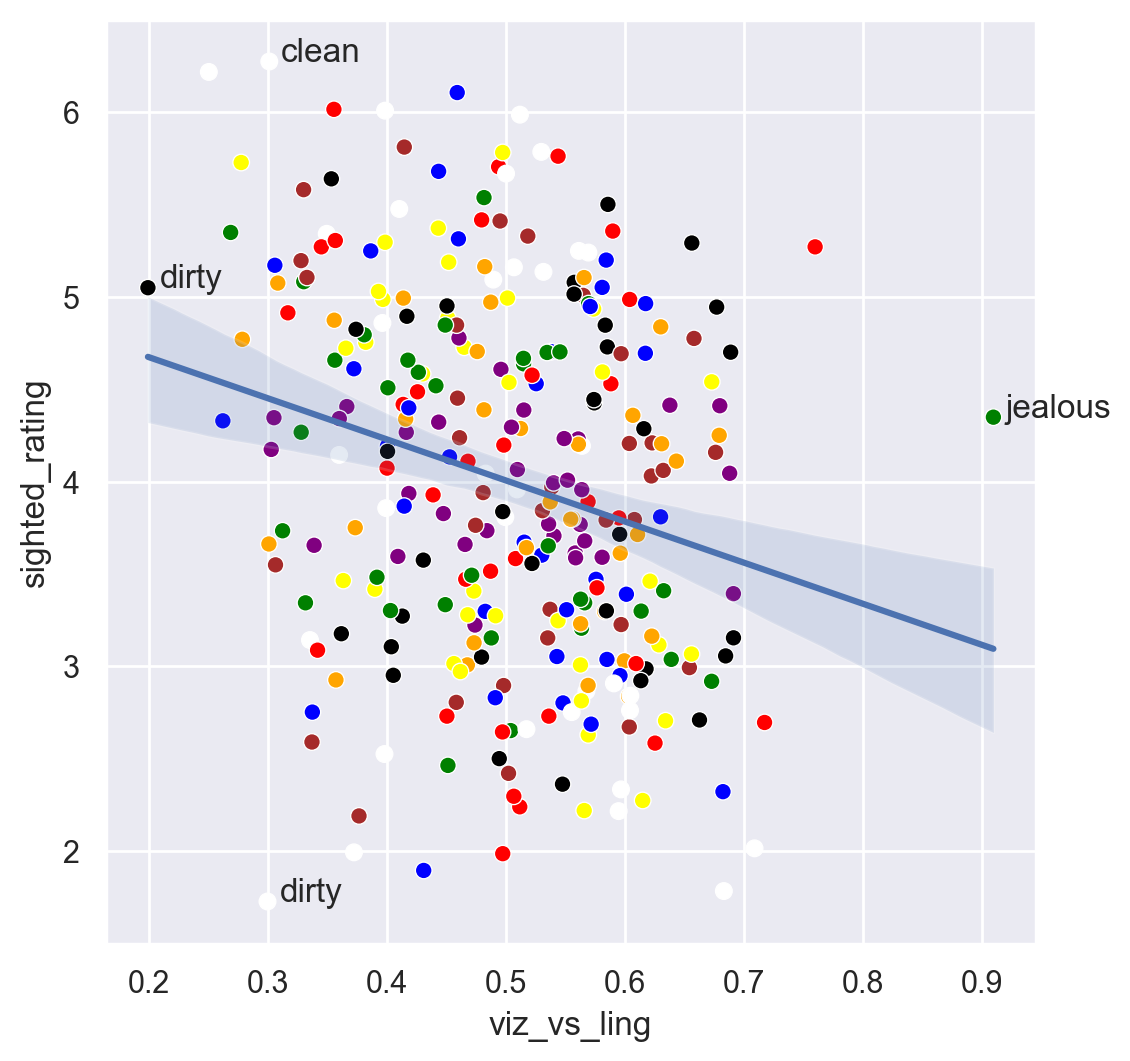

In [12]:
ax = sns.scatterplot(
    x='viz_vs_ling', y='sighted_rating',
    data=df_diff, hue='color', palette=colordict, legend=False
)

sns.regplot(
    x='viz_vs_ling', y='sighted_rating', scatter=False,
    data=df_diff, ax=ax
);

annot(ax, df_diff, 'viz_vs_ling', 'sighted_rating', 'adjective')

print_corr(df_diff, 'viz_vs_ling', 'sighted_rating')

#### Neither vs. both and sighted rating
We expect a strong positive correlation here! This is association strength orthogonal to the linguistic/linguistic nature of the association, so it should be highly similar to the original Saysani dimension ratings.

r(neither_vs_both, sighted_rating) = 0.52 (p = 0.000)


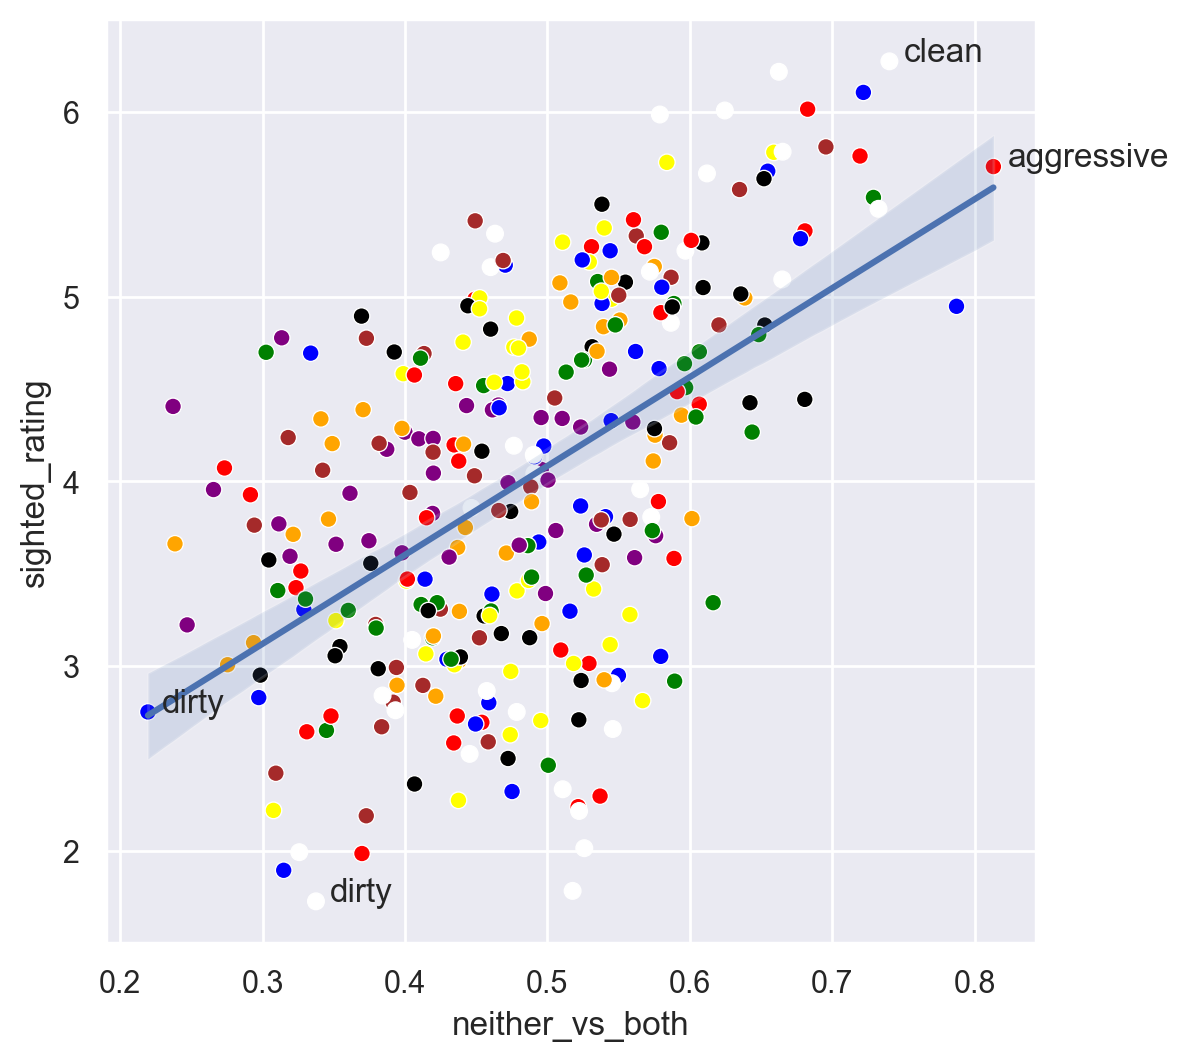

In [13]:
ax = sns.scatterplot(
    x='neither_vs_both', y='sighted_rating',
    data=df_diff, hue='color', palette=colordict, legend=False
)

sns.regplot(
    x='neither_vs_both', y='sighted_rating', scatter=False,
    data=df_diff, ax=ax
);

annot(ax, df_diff, 'neither_vs_both', 'sighted_rating', 'adjective')

print_corr(df_diff, 'neither_vs_both', 'sighted_rating')

#### Visual vs. linguistic and blind ratings

Do we expect a correlation here? Only if blind participants do not weight linguistic or visual association the same when considering if a color and adjective are associated. Naively, we might expect that blind participants do not use visual information at all, but since we think this information ends up encoded in language anyway, at most we would expect a relative under-weighting of visual associations (relative to sighted people, that is).

r(viz_vs_ling, blind_rating) = -0.08 (p = 0.143)


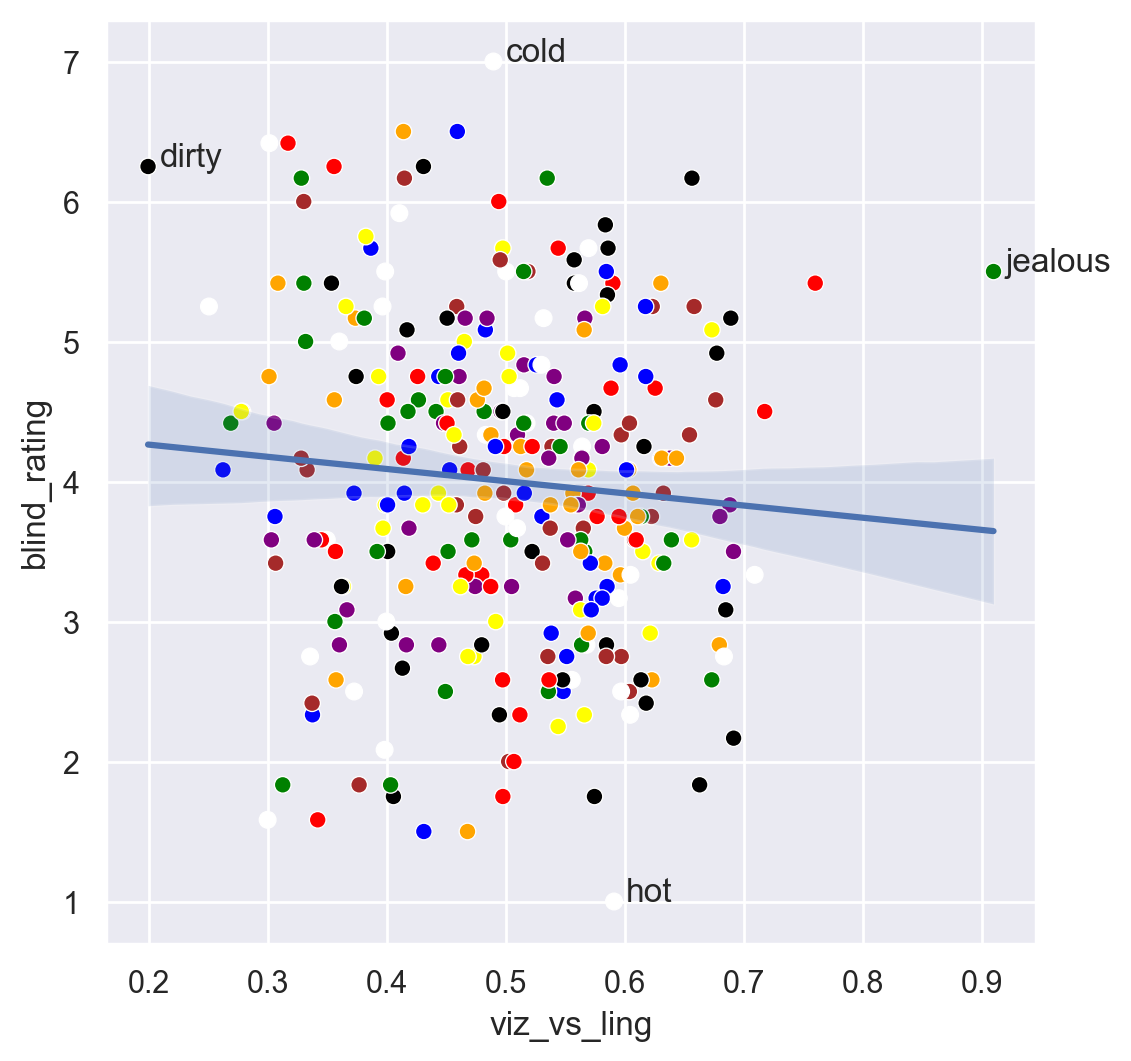

In [14]:
ax = sns.scatterplot(
    x='viz_vs_ling', y='blind_rating',
    data=df_diff, hue='color', palette=colordict, legend=False
)

sns.regplot(
    x='viz_vs_ling', y='blind_rating', scatter=False,
    data=df_diff, ax=ax
);

annot(ax, df_diff, 'viz_vs_ling', 'blind_rating', 'adjective')

print_corr(df_diff, 'viz_vs_ling', 'blind_rating')

#### Neither vs. both and blind rating

We expect a strong positive correlation here! This is association strength orthogonal to the linguistic/linguistic nature of the association, so it should be highly similar to the original Saysani dimension ratings.

r(neither_vs_both, blind_rating) = 0.40 (p = 0.000)


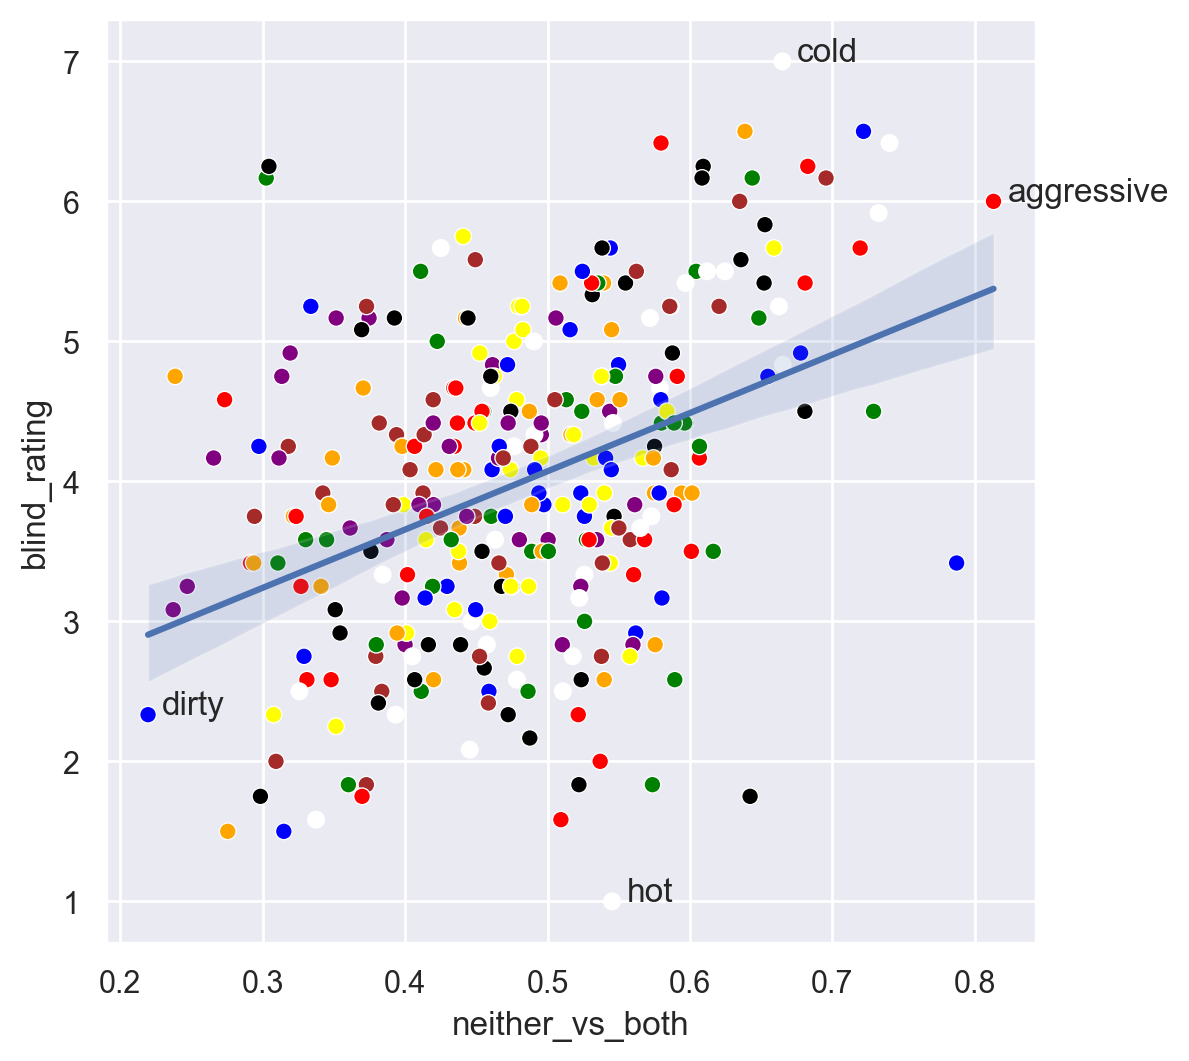

In [15]:
ax = sns.scatterplot(
    x='neither_vs_both', y='blind_rating',
    data=df_diff, hue='color', palette=colordict, legend=False
)

sns.regplot(
    x='neither_vs_both', y='blind_rating', scatter=False,
    data=df_diff, ax=ax
);

annot(ax, df_diff, 'neither_vs_both', 'blind_rating', 'adjective')

print_corr(df_diff, 'neither_vs_both', 'blind_rating')

### Comparing the "most linguistic" and "most visual" quartiles.

In [16]:
df_sorted = df_diff.sort_values('viz_vs_ling', ascending=True)
df_viz = df_sorted[:int(len(df_sorted) / 4)]
df_ling = df_sorted[int((len(df_sorted) / 4) * 3):]
display(df_viz)
display(df_ling)

,adjective,color,cosine_fic_z,viz_vs_ling,neither_vs_both,blind_rating,sighted_rating,rating_diff
72,dirty,black,0.765758,0.198856,0.609296,6.250000,5.048951,-1.201049
178,light,white,-0.946734,0.250063,0.662503,5.250000,6.216783,0.966783
253,slow,blue,-0.518417,0.261855,0.544760,4.083333,4.328467,0.245134
21,alive,green,0.110434,0.268411,0.579924,4.416667,5.348148,0.931481
179,light,yellow,-1.898647,0.277265,0.583861,4.500000,5.726619,1.226619
...,...,...,...,...,...,...,...,...
74,dirty,brown,1.804482,0.414416,0.695553,6.166667,5.810219,-0.356448
49,clean,orange,1.207871,0.415567,0.340938,3.250000,4.338235,1.088235
23,alive,purple,0.400145,0.416081,0.399936,2.833333,4.266187,1.432854
270,stale,black,-0.076217,0.416588,0.369467,5.083333,4.894366,-0.188967


,adjective,color,cosine_fic_z,viz_vs_ling,neither_vs_both,blind_rating,sighted_rating,rating_diff
262,soft,blue,-1.798105,0.580787,0.580307,3.166667,5.050725,1.884058
287,submissive,yellow,-0.288025,0.581044,0.482120,5.250000,4.592857,-0.657143
148,heavy,orange,-1.610499,0.582895,0.438206,3.416667,3.296296,-0.120370
90,dull,black,1.046401,0.583371,0.652652,5.833333,4.846154,-0.987179
263,soft,brown,-2.002131,0.584088,0.537829,2.750000,3.791045,1.041045
...,...,...,...,...,...,...,...,...
99,exciting,black,1.046401,0.691191,0.487549,2.166667,3.153846,0.987179
34,angry,white,0.488253,0.708892,0.525888,3.333333,2.014388,-1.318945
222,relaxed,red,-0.432307,0.717325,0.453973,4.500000,2.695652,-1.804348
168,jealous,red,0.736729,0.759836,0.530960,5.416667,5.270073,-0.146594


In [17]:
print('whole dataset:')
print_corr(df_diff, 'blind_rating', 'sighted_rating')
print('\nmost linguistic quartile:')
print_corr(df_ling, 'blind_rating', 'sighted_rating')
print('\nmost visual quartile:')
print_corr(df_viz, 'blind_rating', 'sighted_rating')

whole dataset:
r(blind_rating, sighted_rating) = 0.70 (p = 0.000)

most linguistic quartile:
r(blind_rating, sighted_rating) = 0.71 (p = 0.000)

most visual quartile:
r(blind_rating, sighted_rating) = 0.73 (p = 0.000)


Seems like the correlation is exactly the same in the most visual quartile as in the most linguistic quartile!

# Convert notebook to html

In [20]:
convert_notebook('visual_vs_linguistic_ratings')

Jupyter notebook `visual_vs_linguistic_ratings` converted successfully.